In [1]:
import sys
sys.path.insert(0,'../')

from pyDenStream import DenStream

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
num_samples = 100
num_features = 2

sigma = 0.1

In [4]:
# Generating test data

np.random.seed(42)

# Generating data for cluster 1.
center_1 = np.array([1.0, 1.0]).reshape((1, num_features))
x_1 = center_1 + np.random.normal(0.0, sigma, [num_samples, num_features])
y_1 = np.repeat(0, num_samples).reshape((num_samples, 1))
t_1 = np.linspace(1, 100, num=num_samples).reshape((num_samples, 1))

# Generating data for cluster 2.
center_2 = np.array([1.0, -1.0]).reshape((1, num_features))
x_2 = center_2 + np.random.normal(0.0, sigma, [num_samples, num_features])
y_2 = np.repeat(1, num_samples).reshape((num_samples, 1))
t_2 = np.linspace(101, 200, num=num_samples).reshape((num_samples, 1))

# Generating data for cluster 3.
center_3 = np.array([-1.0, -1.0]).reshape((1, num_features))
x_3 = center_3 + np.random.normal(0.0, sigma, [num_samples, num_features])
y_3 = np.repeat(2, num_samples).reshape((num_samples, 1))
t_3 = np.linspace(51, 150, num=num_samples).reshape((num_samples, 1))

# Generating data for cluster 4.
center_4 = np.array([-1.0, 1.0]).reshape((1, num_features))
x_4 = center_4 + np.random.normal(0.0, sigma, [num_samples, num_features])
y_4 = np.repeat(3, num_samples).reshape((num_samples, 1))
t_4 = np.linspace(51, 150, num=num_samples).reshape((num_samples, 1))

X = np.concatenate([x_1, x_2, x_3, x_4], axis=0).astype(float)
Y = np.concatenate([y_1, y_2, y_3, y_4], axis=0).astype(int)
T = np.concatenate([t_1, t_2, t_3, t_4], axis=0).astype(int)

# Sorting data s.t. they come in time order.
idx = np.argsort(T, axis=0).reshape(T.shape[0],)
X = X[idx, :]
Y = Y[idx, :]
T = T[idx, :]

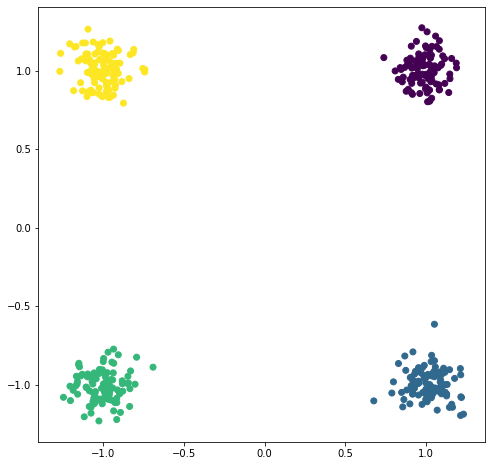

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0])
plt.show()

In [6]:
eps = 0.3
lambd = 0.1
beta = 0.2
mu = 10
min_samples = 1

label_metrics_list = [metrics.homogeneity_score, metrics.completeness_score]

In [7]:
def generator(X, Y, T):
    for i in range(0, X.shape[0]):
        yield {
            "time": int(T[i, :]),
            "feature_array": X[i, :].reshape((1, X.shape[1])),
            "label": int(Y[i, :])
        }

gen = generator(X, Y, T)
ds = DenStream(eps, beta, mu, lambd, min_samples, label_metrics_list)

In [8]:
ds.fit_generator(gen, request_period=100, normalize=True)

In [9]:
ds.metrics_results

[{'iteration': 100,
  'metrics': [{'name': 'homogeneity_score', 'value': 1.0},
   {'name': 'completeness_score', 'value': 0.7716970557081937}]},
 {'iteration': 200,
  'metrics': [{'name': 'homogeneity_score', 'value': 1.0},
   {'name': 'completeness_score', 'value': 1.0}]},
 {'iteration': 300,
  'metrics': [{'name': 'homogeneity_score', 'value': 1.0},
   {'name': 'completeness_score', 'value': 1.0}]}]